# Autoencoder zum Komprimieren von Bilddaten

## Einlesen der MNIST-Daten

In [1]:
import gzip
import numpy as np
from keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/mnist/train-images-idx3-ubyte.gz")
X_test = open_images("../data/mnist/t10k-images-idx3-ubyte.gz")

X_train = X_train / 255.
X_test = X_test / 255.

## Defintion des Autoencoder-Modells aufgeteilt in Encoder und Decoders

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

encoder = Sequential()
encoder.add(Conv2D(1, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)))
encoder.add(MaxPooling2D(pool_size=(2, 2)))
encoder.add(Conv2D(2, kernel_size=(3, 3), padding="same", activation="relu"))
encoder.add(MaxPooling2D(pool_size=(2, 2)))

decoder = Sequential()
decoder.add(Conv2D(2, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(7, 7, 2)))
decoder.add(UpSampling2D(size=(2, 2)))
decoder.add(Conv2D(4, kernel_size=(3, 3), padding="same", activation="relu"))
decoder.add(UpSampling2D(size=(2, 2)))
decoder.add(Conv2D(1, kernel_size=(3, 3), padding="same", activation="sigmoid"))

model = Sequential()
model.add(encoder)
model.add(decoder)

model.compile(optimizer="rmsprop", loss="mse")
model.summary()

/Users/alex/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 7, 7, 2)        │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ (None, 28, 28, 1)      │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

## Autoencoder - Model Training

In [5]:
model.fit(
    X_train.reshape(-1, 28, 28, 1), 
    X_train.reshape(-1, 28, 28, 1), 
    batch_size=32, 
    epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0362
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0205
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0176
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0160
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0152
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0146
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0142
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0139
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0136
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0134


## Visualisierung der Ergebnisse

Anzeigen der Testdaten, die als Input für den Encoder dienen

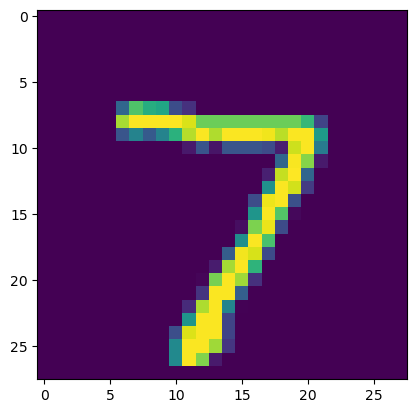

Dimension der Input-Daten(Bilder):  (28, 28)


In [20]:
import matplotlib.pyplot as plt

plt.imshow(X_test[0])
plt.show()
print("Dimension der Input-Daten(Bilder): ", X_test[0].shape)

Anzeigen des Encoder-Outputs (2x (28,28)-Layer-Outputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


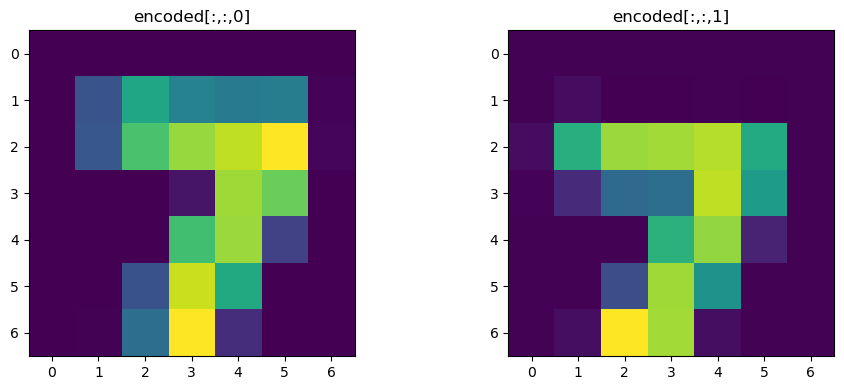

Dimension des Encoder-Outputs:  (1, 7, 7, 2)


In [22]:
encoded = encoder.predict(X_test[0].reshape(-1, 28, 28, 1))


fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(encoded[0, :, :, 0])
axs[0].set_title("encoded[:,:,0]")
axs[1].imshow(encoded[0, :, :, 1])
axs[1].set_title("encoded[:,:,1]")
plt.tight_layout()
plt.show()
print("Dimension des Encoder-Outputs: ", encoded.shape)


Anzeigen des Decoder-Outputs durch Input des Encoder-Outpus

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


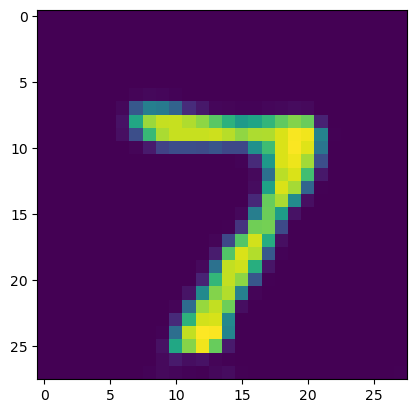

In [15]:
decoded = decoder.predict(encoded)
decoded.shape
plt.imshow(decoded.reshape(28, 28))
plt.show()

Vergleich mit den Testdaten

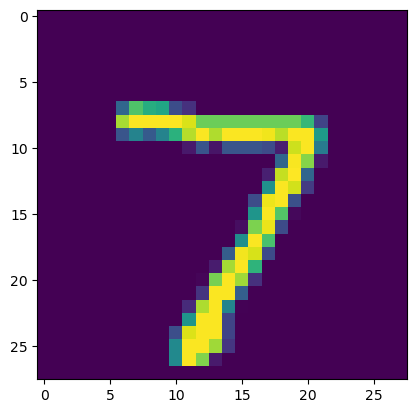

In [16]:
plt.imshow(X_test[0])
plt.show()